# Модель (*)ARCH (пакет [`arch`](https://arch.readthedocs.io/en/latest/index.html))

In [1]:
import numpy as np
import pandas as pd

from arch import arch_model

# from arch.univariate import ARX
# from arch.univariate import 

import pandas_datareader.data as web

# настройки визуализация
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

Основные модели (*)ARCH
* [`ARCH(p)`](https://arch.readthedocs.io/en/latest/univariate/generated/arch.univariate.ARCH.html#arch.univariate.ARCH)
* [`GARCH(p,0,q,power)`](https://arch.readthedocs.io/en/latest/univariate/generated/arch.univariate.GARCH.html#arch.univariate.GARCH)
* [`EGARCH(p,q)`](https://arch.readthedocs.io/en/latest/univariate/generated/arch.univariate.EGARCH.html#arch.univariate.EGARCH)
* [`APARCH(p,o,q,delta)`](https://arch.readthedocs.io/en/latest/univariate/generated/arch.univariate.APARCH.html#arch.univariate.APARCH)
* [`EWMAVariance(lambda)`](https://arch.readthedocs.io/en/latest/univariate/generated/arch.univariate.EWMAVariance.html#arch.univariate.EWMAVariance)

## Подгонка (*)ARCH заданного порядка

Загрузим из БД [`FRED`](https://fred.stlouisfed.org/) недельные данные по 3-Month Treasury Bill Secondary Market Rate (Symbol [`WTB3MS`](https://fred.stlouisfed.org/series/WTB3MS)) с 2000-01-01 по 2023-12-31 и создадим датафрейм `y` - первая разность ставки

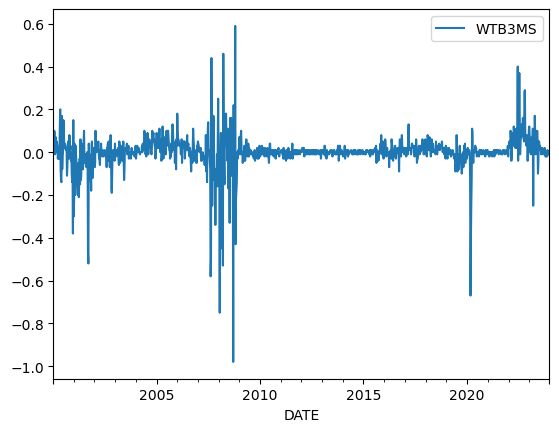

In [2]:
rate = web.DataReader(name='WTB3MS', data_source='fred', start='2000-01-01', end='2023-12-31')
y = rate.diff().dropna()

y.plot()
plt.show()

Подгоним модель AR(2)-GARCH(p=1,o=0,q=1)

Спецификация

\begin{align*}
	y_t&=\alpha_0+\phi_1y_{t-1}+\phi_2y_{t-2}+u_t \\ u_t&=\sigma_t \epsilon_t \\
	\sigma^\lambda_t &=\omega+\alpha|\epsilon_{t-1}|^\lambda+\beta\sigma^\lambda_{t-1}
\end{align*}

где $\lambda=2$

In [3]:
am = arch_model(y, mean='ARX', lags=2, vol='GARCH', p=1, q=1, power=2)

res = am.fit()

res.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 95149951.0169928
Iteration:      2,   Func. Count:     23,   Neg. LLF: 46304286.08150615
Iteration:      3,   Func. Count:     37,   Neg. LLF: -2111.599917827303
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2111.599920494877
            Iterations: 7
            Function evaluations: 37
            Gradient evaluations: 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                 WTB3MS   R-squared:                       0.058
Mean Model:                        AR   Adj. R-squared:                  0.057
Vol Model:                      GARCH   Log-Likelihood:                2111.60
Distribution:                  Normal   AIC:                          -4211.20
Method:            Maximum Likelihood   BIC:                          -4180.42
                                        No. Observations:                 1249
Date:                Sun, Apr 07 2024   Df Residuals:                     1246
Time:                        00:26:33   Df Model:                            3
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Const      2.6068e-03  8.195e-04      3.181  1.469e-03 [1.001e-03,4.213e-03]
WTB3MS[1]      0.2337  7.414e-02      3.152  1.621e-03   [8.839e-02,  0.379]
WTB3MS[2]      0.0313  5.206e-02      0.601      0.548  [-7.073e-02,  0.133]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.3357e-04  4.241e-05      3.150  1.634e-03 [5.046e-05,2.167e-04]
alpha[1]       0.2000  4.327e-02      4.622  3.797e-06     [  0.115,  0.285]
beta[1]        0.7800  2.906e-02     26.836 1.213e-158     [  0.723,  0.837]
============================================================================

Covariance estimator: robust
"""

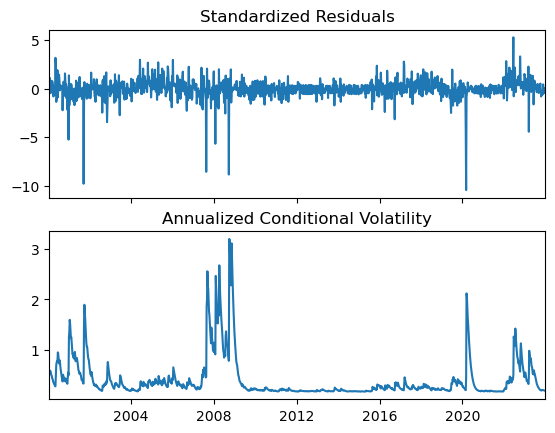

In [4]:
res.plot(annualize='W')
plt.show()

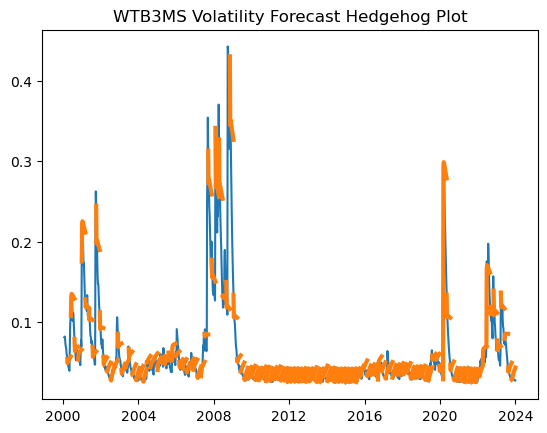

In [5]:
res.hedgehog_plot(plot_type='volatility')
plt.show()

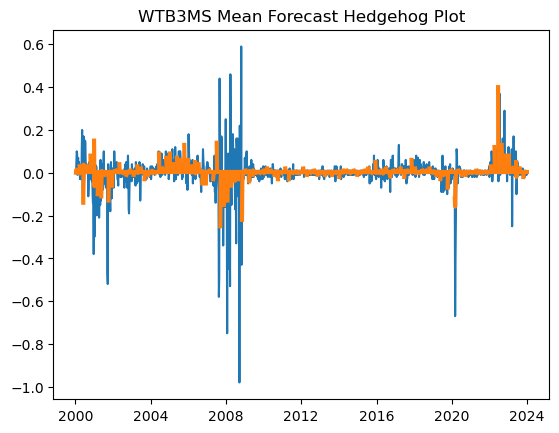

In [6]:
res.hedgehog_plot(plot_type='mean')
plt.show()

In [7]:
res.arch_lm_test(lags=5)

ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 138.9767
P-value: 0.0000
Distributed: chi2(5)
WaldTestStatistic, id: 0x149f77710

## Прогнозирование

построим прогноз на 5 периодов по модели AR(1)-GARCH(1,1)

Спецификация

\begin{align*}
	y_t&=\alpha_0+\phi y_{t-1}+u_t \\ u_t&=\sigma_t \epsilon_t \\
	\sigma^\lambda_t &=\omega+\alpha |\epsilon_{t-1}|^\lambda+\beta\sigma^\lambda_{t-1}
\end{align*}

где $\lambda=2$

In [8]:
am = arch_model(y, mean='ARX', lags=1, vol='GARCH', p=1, q=1, o=0)

res = am.fit()

y_forecasts = res.forecast(horizon=5)

# Прогноз среднего
y_forecasts.mean

Iteration:      1,   Func. Count:      7,   Neg. LLF: 97288204.65900543
Iteration:      2,   Func. Count:     21,   Neg. LLF: 45951359.712147325
Iteration:      3,   Func. Count:     34,   Neg. LLF: -2112.098588874516
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2112.0985915198335
            Iterations: 7
            Function evaluations: 34
            Gradient evaluations: 3


,h.1,h.2,h.3,h.4,h.5
DATE,,,,,
2023-12-29,0.002694,0.003344,0.003501,0.003539,0.003548


In [9]:
y_forecasts.residual_variance

,h.1,h.2,h.3,h.4,h.5
DATE,,,,,
2023-12-29,0.000728,0.000847,0.000964,0.001078,0.00119


In [10]:
# прогноз волатильности
y_forecasts.variance

,h.1,h.2,h.3,h.4,h.5
DATE,,,,,
2023-12-29,0.000728,0.000889,0.001015,0.001137,0.001256


In [12]:
am = arch_model(y, mean='ARX', lags=1, vol='EGARCH', p=1, q=1, o=0)

res = am.fit()

y_forecasts = res.forecast(horizon=1)

# Прогноз среднего
y_forecasts.mean

Iteration:      1,   Func. Count:      7,   Neg. LLF: 2306087074276992.5
Iteration:      2,   Func. Count:     23,   Neg. LLF: 2383081404170.882
Iteration:      3,   Func. Count:     33,   Neg. LLF: 96816.81886446394
Iteration:      4,   Func. Count:     42,   Neg. LLF: 25190990057.973473
Iteration:      5,   Func. Count:     51,   Neg. LLF: -2258.5044286795965
Iteration:      6,   Func. Count:     58,   Neg. LLF: 29707126958.60692
Iteration:      7,   Func. Count:     67,   Neg. LLF: -2265.5296815368138
Iteration:      8,   Func. Count:     73,   Neg. LLF: -2265.6101627648386
Iteration:      9,   Func. Count:     79,   Neg. LLF: -2265.6176075965627
Iteration:     10,   Func. Count:     85,   Neg. LLF: -2265.6178467625723
Iteration:     11,   Func. Count:     91,   Neg. LLF: -2265.617909602254
Iteration:     12,   Func. Count:     96,   Neg. LLF: -2265.6179095988437
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2265.617909602254
            

,h.1
DATE,
2023-12-29,0.001668


In [13]:
# прогноз волатильности
y_forecasts.variance

,h.1
DATE,
2023-12-29,0.000225
